### $5$-QUBIT CODE UNDER RANDOM PAULI ERROR

In this project, we create a function that takes as input $x \in \mathbb{F}_2^n$, and an error probability $p \in (0,1)$. The function quantum circuit that prepares the logical state, $\Ket{x_L}$, for the 5-qubit code, and runs it through a random Pauli error channel, with error rate $p$ (for each qubit), measures syndromes, applies the recovery operations, and measures the data qubits. We define the success probabilty to be the probabilty that a component of $\Ket{x_L}$ is measured at the end. We then visualize the dependence of the success probability for various values of p. 

In [1]:
%pip install qiskit qiskit_aer pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### The $5$-qubit code. 

The $5$-qubit code is a stabilizer code defined by the stabilizer group $\langle P_1, P_2, P_3, P_4 \rangle$, where $P_1=XZZX 1,P_2=XZZX,P_3=X1XZZ,P_4=ZX1XZ$. 

In [1]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister, ClassicalRegister
from qiskit.quantum_info import Statevector

from qiskit_aer import AerSimulator
from qiskit import transpile

import numpy as np

### The syndrome measurement circuit. 

We design a circuit that gets the four syndromes for the $5$-qubit code, using measurement. 

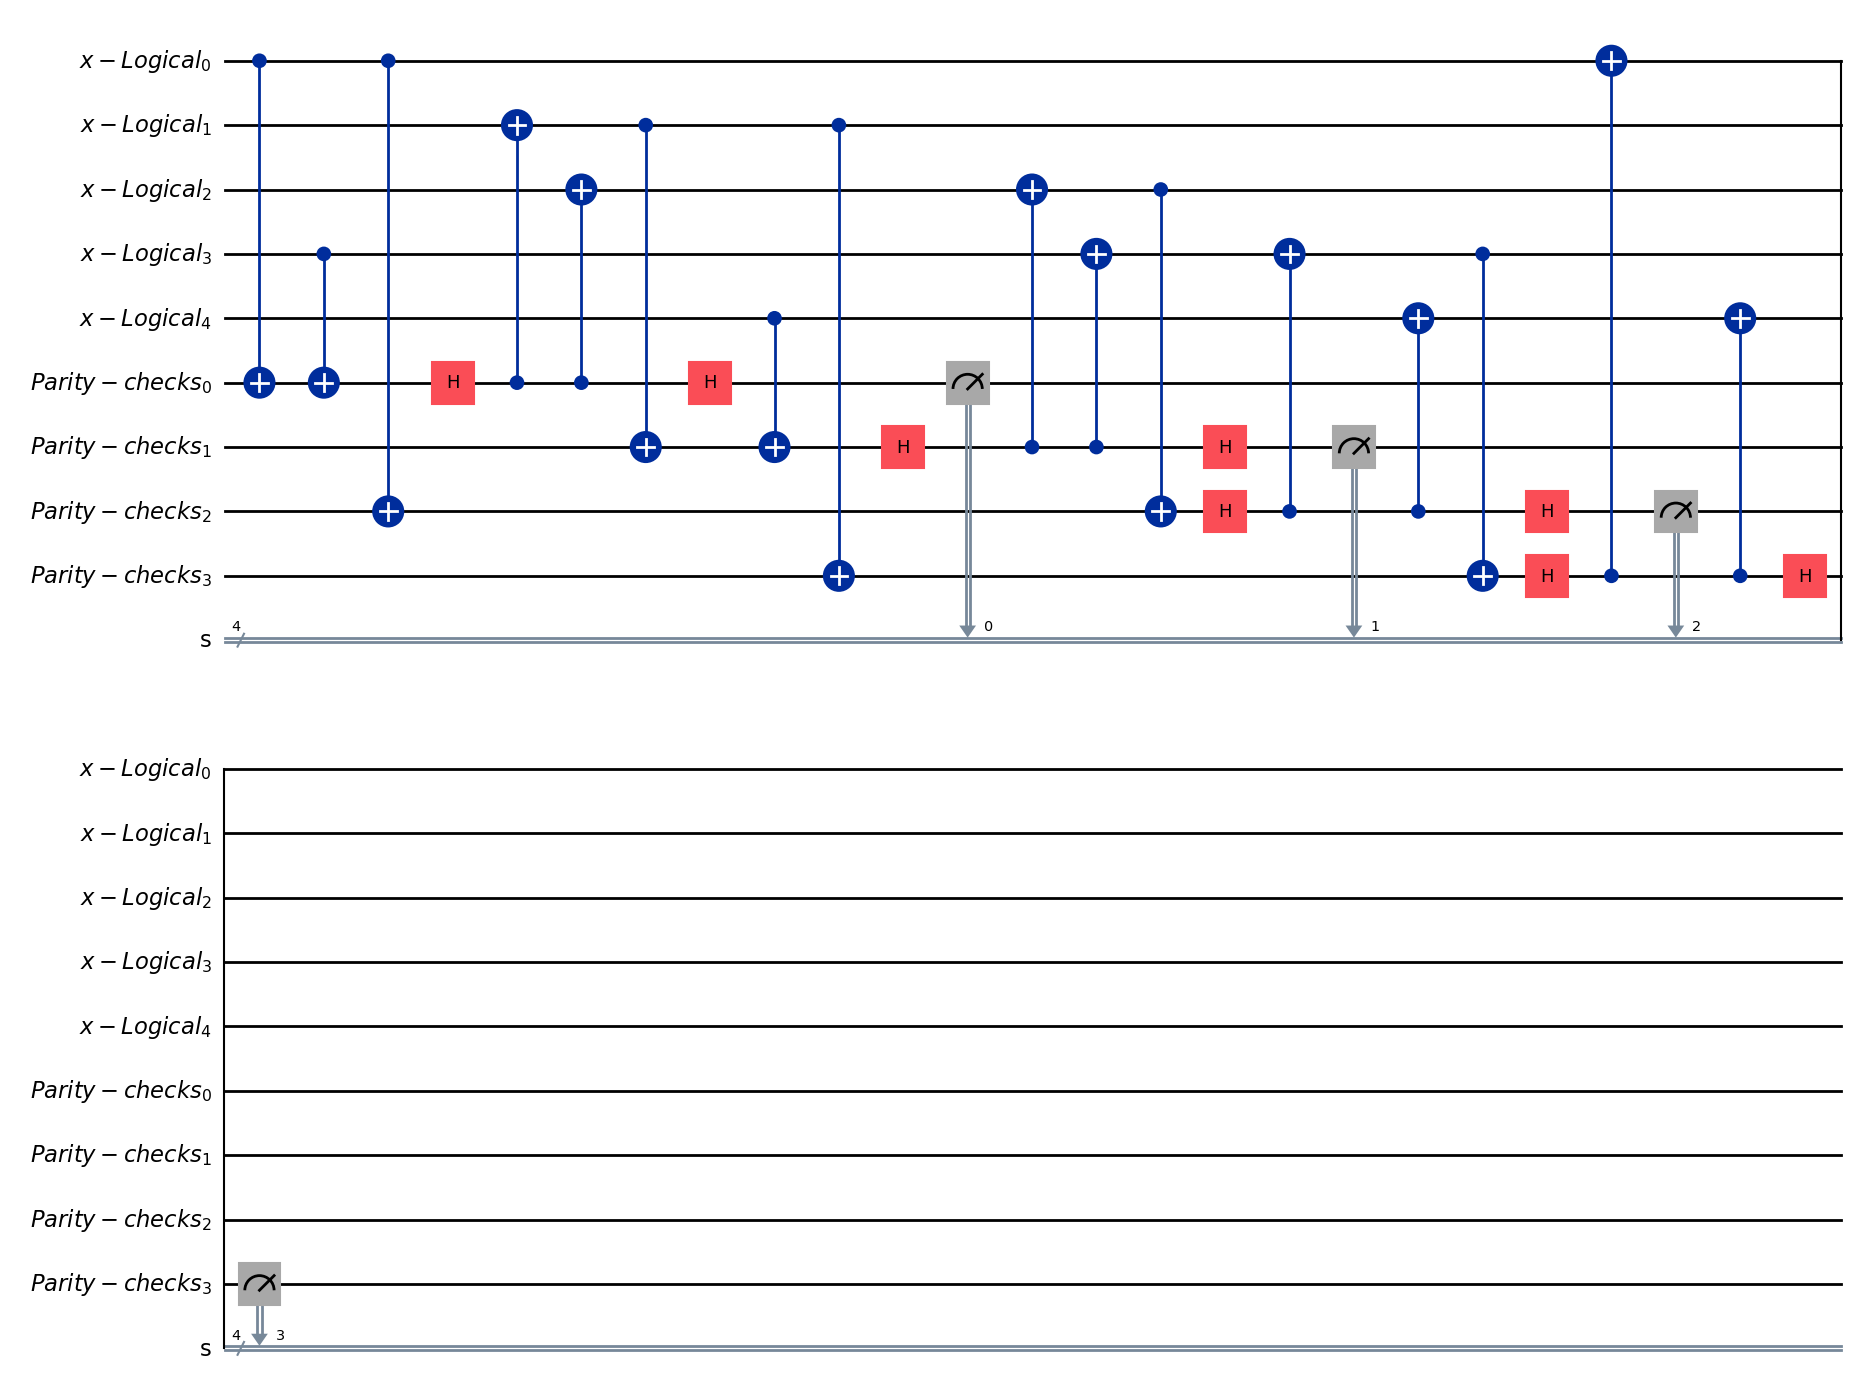

In [13]:
data_register=QuantumRegister(size=5, name="x-Logical")
check_register=QuantumRegister(size=4, name="Parity-checks")
code_circuit=QuantumCircuit(data_register, check_register)

# Extract syndrome for P_1
code_circuit.cx(data_register[0], check_register[0])
code_circuit.cx(data_register[3], check_register[0])
code_circuit.h(check_register[0])
code_circuit.cx(check_register[0], data_register[1])
code_circuit.cx(check_register[0], data_register[2])
code_circuit.h(check_register[0])

# Extract syndrome for P_2
code_circuit.cx(data_register[1], check_register[1])
code_circuit.cx(data_register[4], check_register[1])
code_circuit.h(check_register[1])
code_circuit.cx(check_register[1], data_register[2])
code_circuit.cx(check_register[1], data_register[3])
code_circuit.h(check_register[1])

# Extract syndrome for P_3
code_circuit.cx(data_register[0], check_register[2])
code_circuit.cx(data_register[2], check_register[2])
code_circuit.h(check_register[2])
code_circuit.cx(check_register[2], data_register[3])
code_circuit.cx(check_register[2], data_register[4])
code_circuit.h(check_register[2])

# Extract syndrome for P_4
code_circuit.cx(data_register[1], check_register[3])
code_circuit.cx(data_register[3], check_register[3])
code_circuit.h(check_register[3])
code_circuit.cx(check_register[3], data_register[0])
code_circuit.cx(check_register[3], data_register[4])
code_circuit.h(check_register[3])

#Measure syndromes
syndromes = ClassicalRegister(size=4, name="s")
code_circuit.add_register(syndromes)
# measure
code_circuit.measure(check_register, syndromes)
code_circuit.draw(output="mpl")

### fixing errors

We now add fixes to the circuit depending on what the measuements are. The following are the syndromes for each possible single qubit error. 

### Preparing the logical $0$ and $1$ states. 